In [2]:
import numpy as np           #import all the required libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
bank= pd.read_csv("bank-full.csv",sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
from sklearn import preprocessing                  #Label encoding to covert label columns into numeric form
label_encoder=preprocessing.LabelEncoder()
bank["job"]=label_encoder.fit_transform(bank['job'])
bank["marital"]=label_encoder.fit_transform(bank['marital'])
bank["education"]=label_encoder.fit_transform(bank['education'])
bank["default"]=label_encoder.fit_transform(bank['default'])
bank["housing"]=label_encoder.fit_transform(bank['housing'])
bank["loan"]=label_encoder.fit_transform(bank['loan'])
bank["contact"]=label_encoder.fit_transform(bank['contact'])
bank["month"]=label_encoder.fit_transform(bank['month'])
bank["poutcome"]=label_encoder.fit_transform(bank['poutcome'])
bank['y']=label_encoder.fit_transform(bank['y'])


In [9]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [10]:
from sklearn.tree import DecisionTreeClassifier   # Feature engineering to select best features
array=bank.values
X=array[:,0:16]
Y=array[:,16]
model=DecisionTreeClassifier()
model.fit(X,Y)
print(model.feature_importances_)

[0.09909418 0.04306599 0.01741505 0.02549445 0.00186177 0.12328154
 0.02354024 0.00913271 0.01679927 0.08723756 0.09900069 0.29161691
 0.03858896 0.05495923 0.01113137 0.05778007]


In [11]:
BANK=pd.crosstab(bank.y,bank.loan)
BANK

loan,0,1
y,,
0,33162,6760
1,4805,484


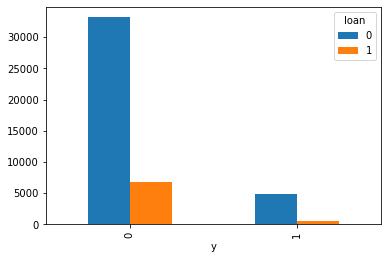

In [12]:
pd.crosstab(bank.y,bank.loan).plot(kind='bar')

In [13]:
bank.shape

(45211, 17)

In [14]:
x=bank.iloc[:,[0,1,5,9,10,11,15]]    #Model fitting
y=bank.iloc[:,16]
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
classifier.coef_

array([[-2.80878684e-02, -4.20869071e-03,  3.91174426e-05,
        -2.49779159e-02, -8.61246301e-02,  3.38030077e-03,
        -4.19188127e-01]])

In [16]:
classifier.predict_proba (x)

array([[0.94597686, 0.05402314],
       [0.95003359, 0.04996641],
       [0.94589974, 0.05410026],
       ...,
       [0.53987714, 0.46012286],
       [0.91913971, 0.08086029],
       [0.8087034 , 0.1912966 ]])

In [17]:
y_pred=classifier.predict(x)  #Prediction 
bank["y_pred"]=y_pred
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


In [18]:
y_prob=pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))   # Probabilities of prediction
new_df=pd.concat([bank,y_prob],axis=1)
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0,0.945977,0.054023
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0,0.950034,0.049966
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0,0.945900,0.054100
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0,0.958409,0.041591
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0,0.923213,0.076787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0,0.669153,0.330847
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0,0.951434,0.048566
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0,0.539877,0.460123
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0,0.919140,0.080860


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39229   693]
 [ 4442   847]]


In [20]:
pd.crosstab(y_pred,y)

y,0,1
row_0,,
0,39229,4442
1,693,847


In [22]:
accuracy=sum(y==y_pred)/bank.shape[0]   # Calculating accuracy
accuracy

0.886421446108248

In [23]:
from sklearn.metrics import classification_report 
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.72      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,classifier.predict(x))
Logit_roc_score

0.571392422351587

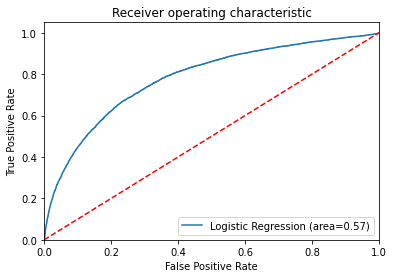

In [32]:
fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1])            #plotting ROC curve which shows performance of prediction model
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  